# FIFA 2018 Man of the Match

Dataset: https://www.kaggle.com/mathan/fifa-2018-match-statistics

Task:
- Train a binary classifier to predict whether a player wins man of the match
- Find clusters of matches in the data

In [197]:
import pandas as pd

df = pd.read_csv('D:/tmp/fifa-2018-match-statistics/FIFA 2018 Statistics.csv',
                 parse_dates=['Date'],
                 index_col=0)
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [198]:
# randomly reserve 5 entries for predictions
# include 2 positive, 3 negative

df_predict_0 = df.loc[df['Man of the Match'] == 'No'].sample(n=3, random_state=42)
df_predict_1 = df.loc[df['Man of the Match'] == 'Yes'].sample(n=2, random_state=42)

df_predict = pd.concat([df_predict_0, df_predict_1])
df.drop(df_predict.index, inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2018-06-15 to 2018-07-15
Data columns (total 26 columns):
Team                      118 non-null object
Opponent                  118 non-null object
Goal Scored               118 non-null int64
Ball Possession %         118 non-null int64
Attempts                  118 non-null int64
On-Target                 118 non-null int64
Off-Target                118 non-null int64
Blocked                   118 non-null int64
Corners                   118 non-null int64
Offsides                  118 non-null int64
Free Kicks                118 non-null int64
Saves                     118 non-null int64
Pass Accuracy %           118 non-null int64
Passes                    118 non-null int64
Distance Covered (Kms)    118 non-null int64
Fouls Committed           118 non-null int64
Yellow Card               118 non-null int64
Yellow & Red              118 non-null int64
Red                       118 non-null int64
Man of the Match   

In [191]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2018-06-15 to 2018-06-16
Data columns (total 26 columns):
Team                      5 non-null object
Opponent                  5 non-null object
Goal Scored               5 non-null int64
Ball Possession %         5 non-null int64
Attempts                  5 non-null int64
On-Target                 5 non-null int64
Off-Target                5 non-null int64
Blocked                   5 non-null int64
Corners                   5 non-null int64
Offsides                  5 non-null int64
Free Kicks                5 non-null int64
Saves                     5 non-null int64
Pass Accuracy %           5 non-null int64
Passes                    5 non-null int64
Distance Covered (Kms)    5 non-null int64
Fouls Committed           5 non-null int64
Yellow Card               5 non-null int64
Yellow & Red              5 non-null int64
Red                       5 non-null int64
Man of the Match          5 non-null object
1st Goal       

### Data Transformation

In [163]:
for c in df.columns:
    print(c, df[c].unique())

Team ['Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal' 'Spain' 'France'
 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark' 'Croatia' 'Nigeria'
 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil' 'Switzerland' 'Sweden'
 'Korea Republic' 'Belgium' 'Panama' 'Tunisia' 'England' 'Colombia'
 'Japan' 'Poland' 'Senegal' 'Russia' 'Saudi Arabia']
Opponent ['Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain' 'Portugal' 'Australia'
 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru' 'Nigeria' 'Croatia'
 'Serbia' 'Costa Rica' 'Mexico' 'Germany' 'Switzerland' 'Brazil'
 'Korea Republic' 'Sweden' 'Panama' 'Belgium' 'England' 'Tunisia' 'Japan'
 'Colombia' 'Senegal' 'Poland' 'Russia' 'Saudi Arabia']
Goal Scored [0 1 3 2 5 6 4]
Ball Possession % [43 57 64 36 39 61 51 49 72 28 52 48 54 46 50 60 40 41 59 47 53 30 70 44
 56 58 42 66 34 71 29 45 55 68 32 38 62 65 35 75 25 37 63]
Attempts [ 8 14 13 12  4 26  9 18 10 11 25 20  6 15  5 17 16 23  7  3 22 19]
On-Target [ 3  4  2  5  1  7  6  9  0 12]
Off-Target [ 3  6  5  2  4 

Non-numeric columns:

```
Team                      128 non-null object -> Label Encode
Opponent                  128 non-null object -> Label Encode
Man of the Match          128 non-null object -> Label Encode
Round                     128 non-null object -> Label Encode
PSO                       128 non-null object -> Label Encode
```

In [164]:
from sklearn.preprocessing import LabelEncoder

encoders = dict() # store our encoders for use during prediction

for c in ['Team', 'Opponent', 'Man of the Match', 'Round', 'PSO']:
    encoders[c] = LabelEncoder()
    df[c] = encoders[c].fit_transform(df[c])

Columns with missing values:

```
1st Goal                  94 non-null float64 -> replace NaN with -1
Own goals                 12 non-null float64 -> replace NaN with 0
Own goal Time             12 non-null float64 -> replace NaN with -1
```

In [149]:
df['1st Goal'].fillna(-1, inplace=True)

df['Own goals'].fillna(0, inplace=True)

df['Own goal Time'].fillna(-1, inplace=True)

In [150]:
# check that all rows have numeric entries (we will skip date)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2018-06-15 to 2018-07-15
Data columns (total 26 columns):
Team                      118 non-null int64
Opponent                  118 non-null int64
Goal Scored               118 non-null int64
Ball Possession %         118 non-null int64
Attempts                  118 non-null int64
On-Target                 118 non-null int64
Off-Target                118 non-null int64
Blocked                   118 non-null int64
Corners                   118 non-null int64
Offsides                  118 non-null int64
Free Kicks                118 non-null int64
Saves                     118 non-null int64
Pass Accuracy %           118 non-null int64
Passes                    118 non-null int64
Distance Covered (Kms)    118 non-null int64
Fouls Committed           118 non-null int64
Yellow Card               118 non-null int64
Yellow & Red              118 non-null int64
Red                       118 non-null int64
Man of the Match     

## Visualization

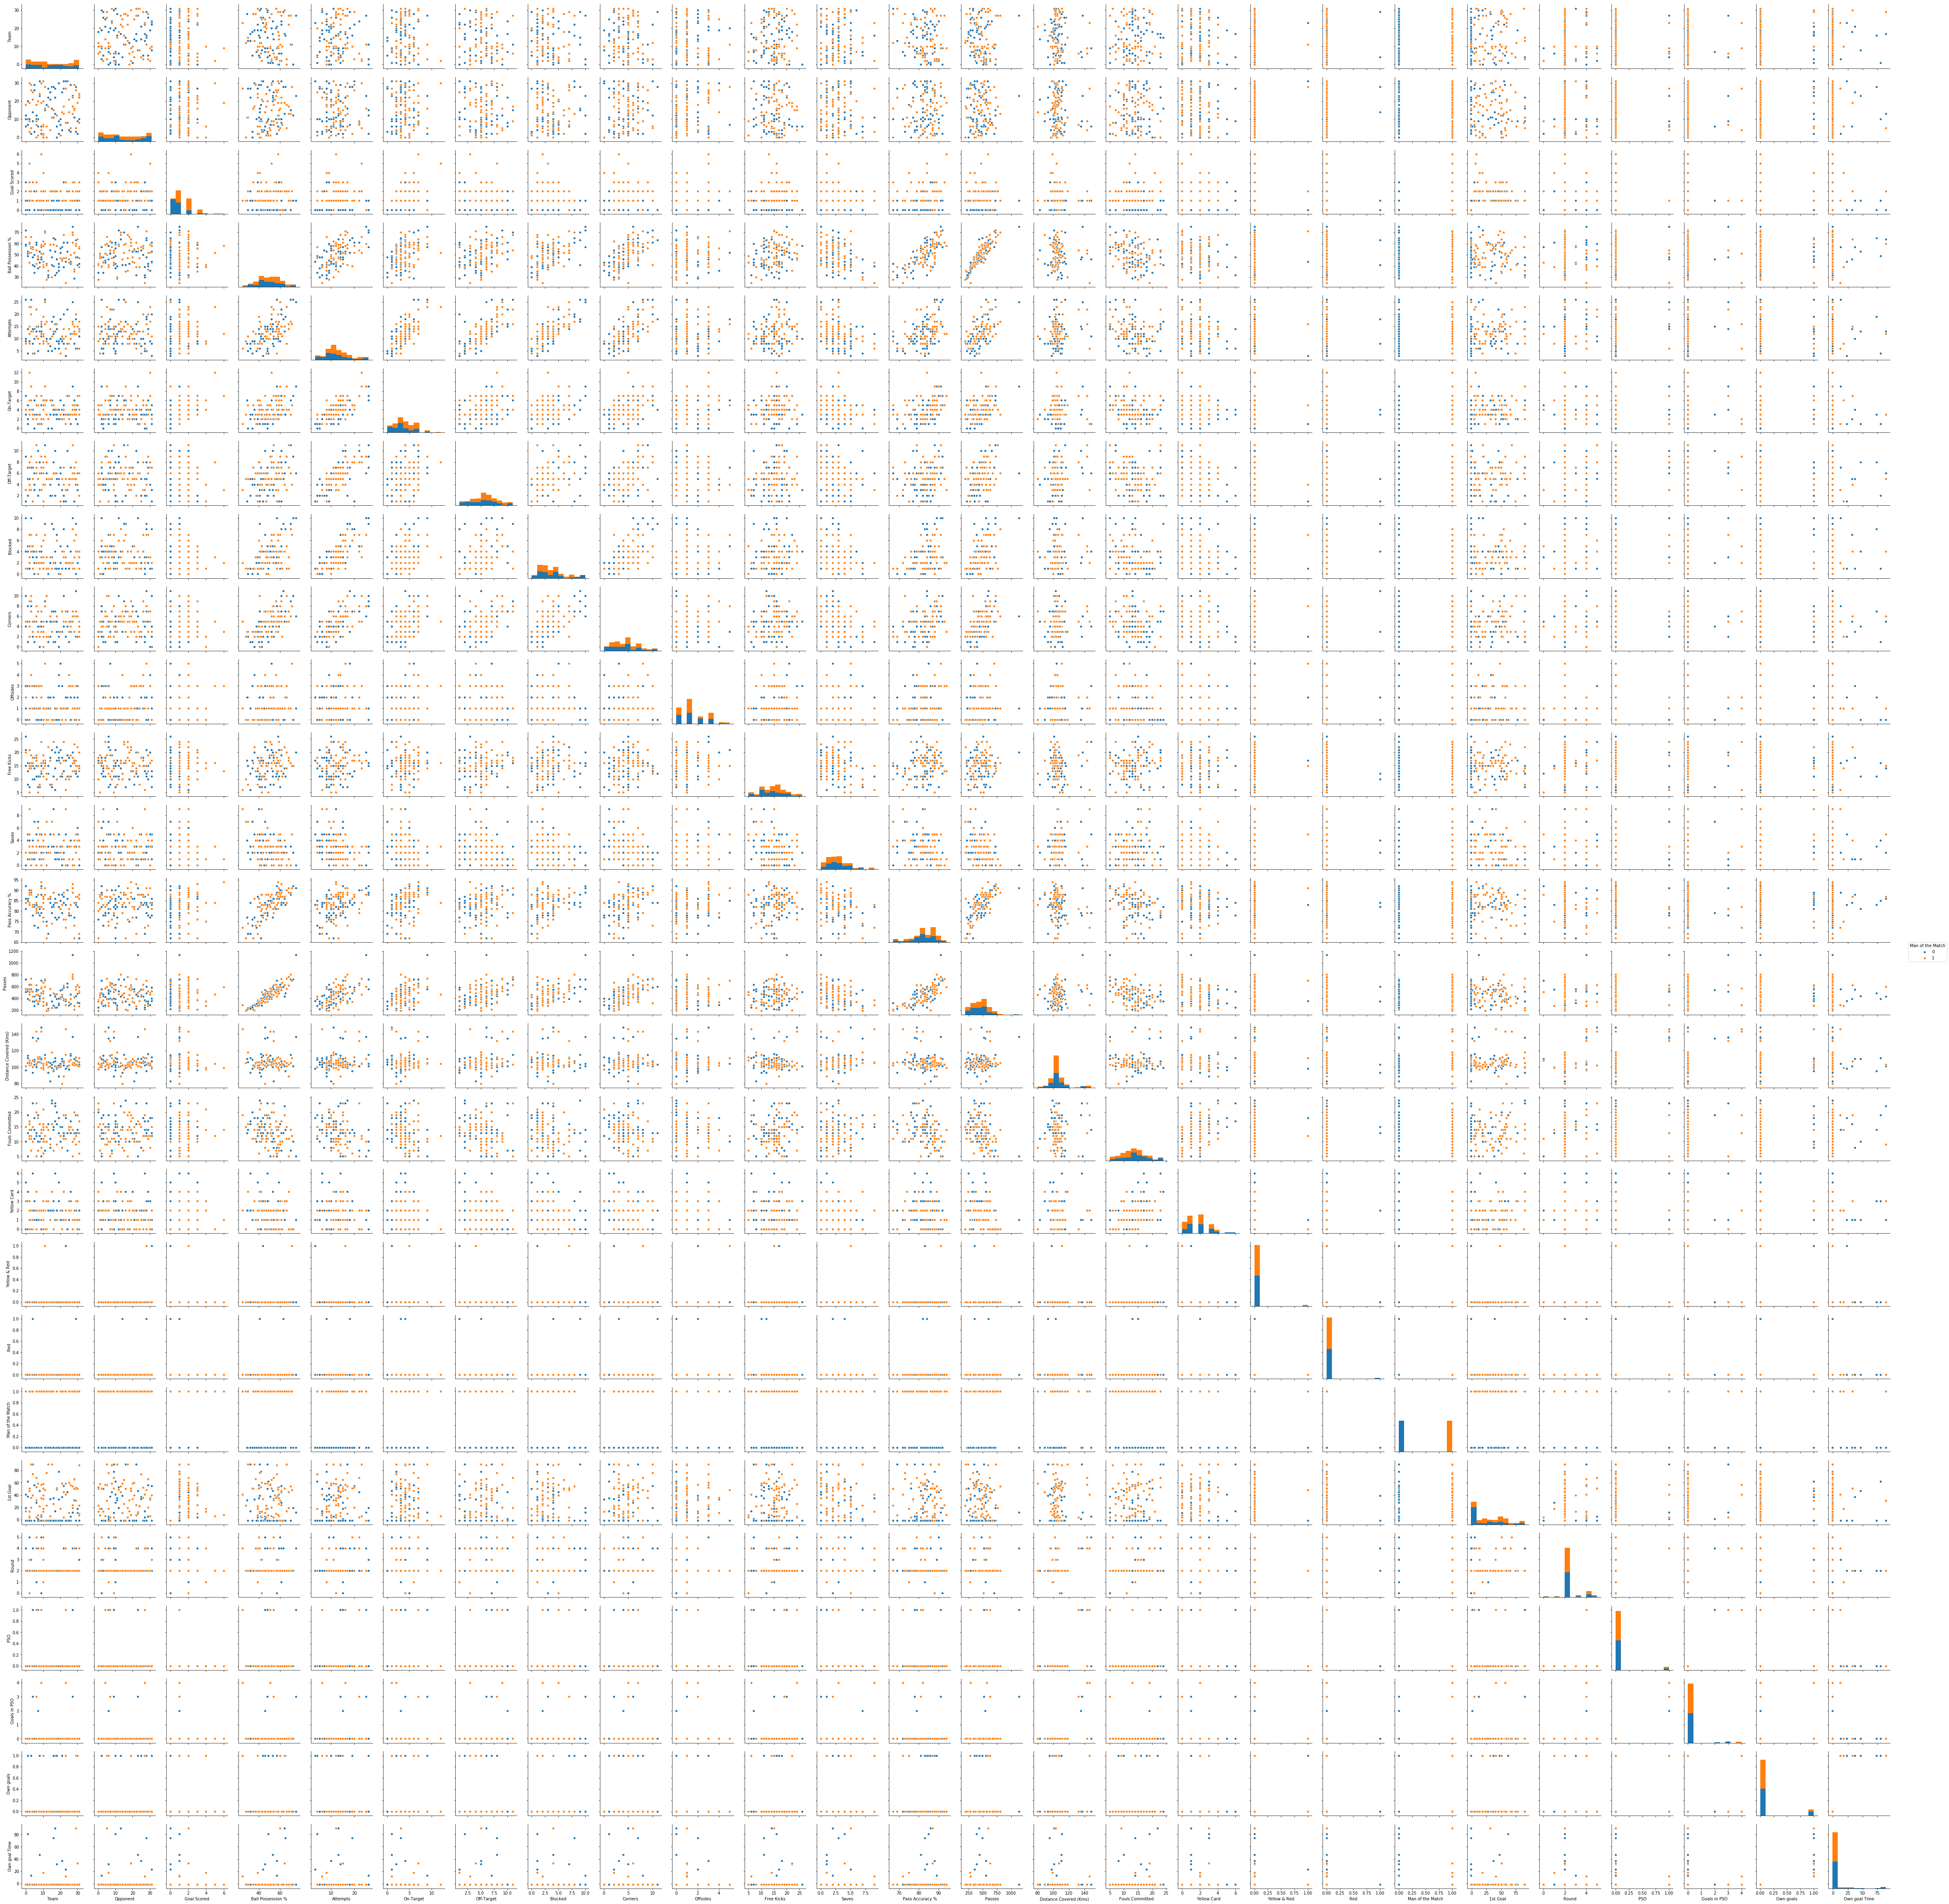

In [151]:
import seaborn as sns

sns.pairplot(df, hue='Man of the Match')

# right click, open image in new browser tab to view and zoom in.

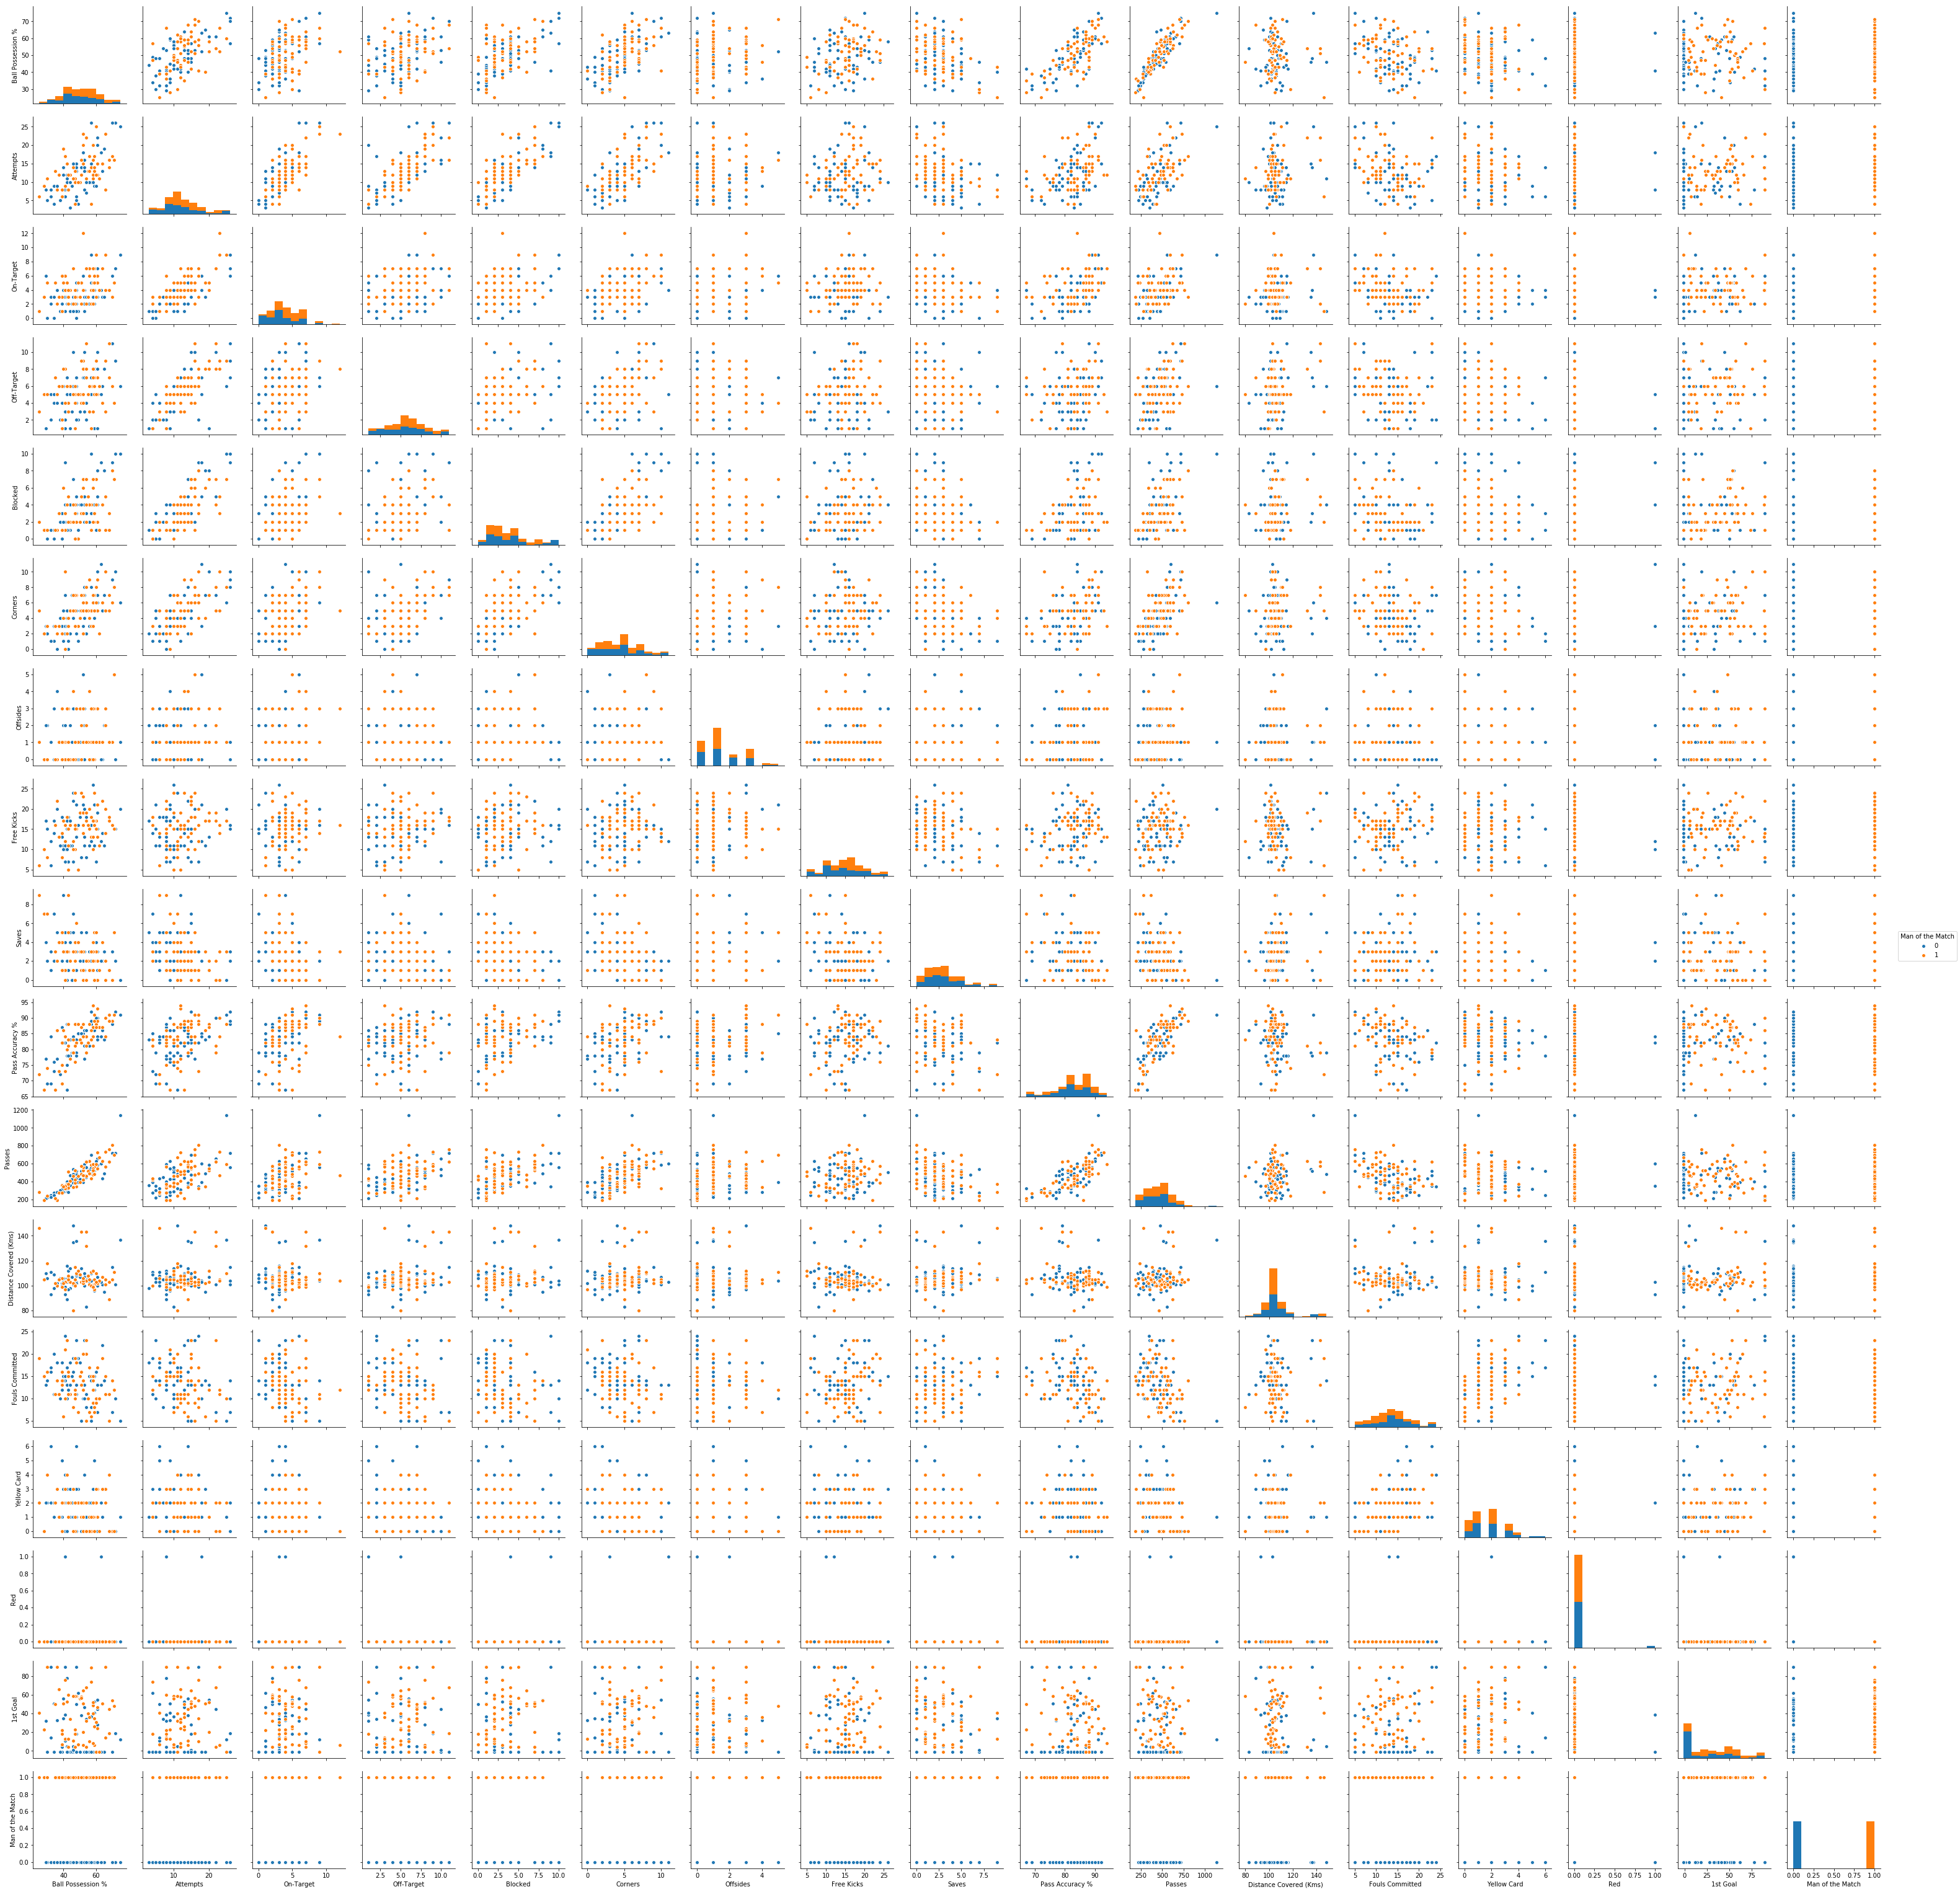

In [152]:
columns = [
    'Ball Possession %',
    'Attempts',
    'On-Target',
    'Off-Target',
    'Blocked',
    'Corners',
    'Offsides',
    'Free Kicks',
    'Saves',
    'Pass Accuracy %',
    'Passes',
    'Distance Covered (Kms)',
    'Fouls Committed',
    'Yellow Card',
    'Red',
    '1st Goal',
    'Man of the Match'
]

sns.pairplot(df[columns], hue='Man of the Match')

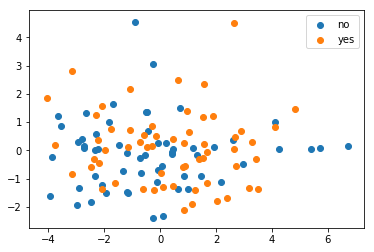

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

columns.remove('Man of the Match')
X = df.loc[:, columns]
X_scaled = StandardScaler().fit_transform(X)

y = df['Man of the Match']
X_2d = PCA(n_components=2).fit_transform(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], label='no')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], label='yes')
ax.legend()
plt.show()

## Training

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<class 'sklearn.dummy.DummyClassifier'>
             precision    recall  f1-score   support

          0       0.50      0.40      0.44        15
          1       0.50      0.60      0.55        15

avg / total       0.50      0.50      0.49        30

AUC 0.5333333333333333
<class 'sklearn.linear_model.logistic.LogisticRegression'>
             precision    recall  f1-score   support

          0       0.58      0.73      0.65        15
          1       0.64      0.47      0.54        15

avg / total       0.61      0.60      0.59        30

AUC 0.7511111111111111
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
             precision    recall  f1-score   support

          0       0.50      0.53      0.52        15
          1       0.50      0.47      0.48        15

avg / total       0.50      0.50      0.50        30

AUC 0.4688888888888889
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
             precision    recall  f1-score   support

          0       

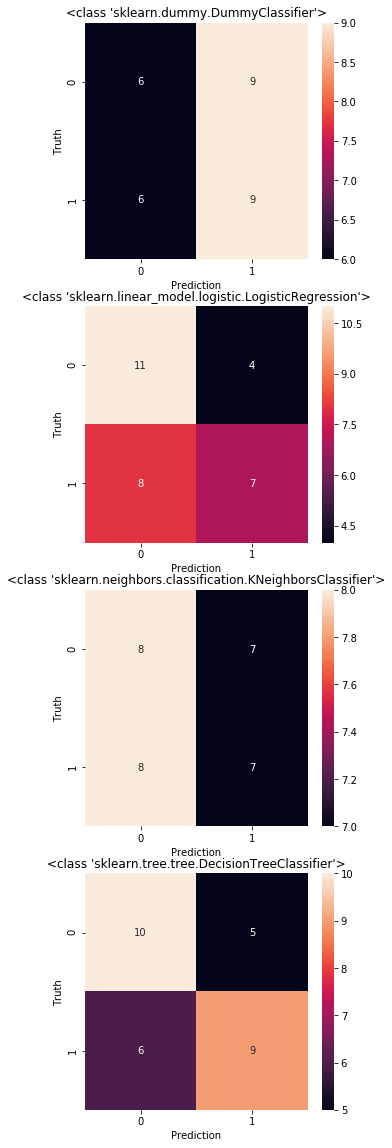

In [155]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
    roc_auc_score

classifiers = [
    DummyClassifier(),
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=42)
]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
axes = axes.flatten()
y_scores = []

for clf, ax in zip(classifiers, axes):
    clf.fit(X_train_scaled, y_train)
    pred = clf.predict(X_test_scaled)
    
    if hasattr(clf, 'decision_function'):
        prob = clf.decision_function(X_test_scaled)
    else:
        prob = clf.predict_proba(X_test_scaled)[:, 1] # positive label=1
    y_scores.append(prob)

    print(clf.__class__)
    print(classification_report(y_test, pred))
    print('AUC', roc_auc_score(y_test, prob))
    
    sns.heatmap(confusion_matrix(y_test, pred),
                annot=True, ax=ax, fmt='d')
    ax.set(xlabel='Prediction', ylabel='Truth', title=clf.__class__); 

{'C': 1, 'gamma': 0.1}
             precision    recall  f1-score   support

          0       0.59      0.67      0.62        15
          1       0.62      0.53      0.57        15

avg / total       0.60      0.60      0.60        30

AUC 0.5466666666666666


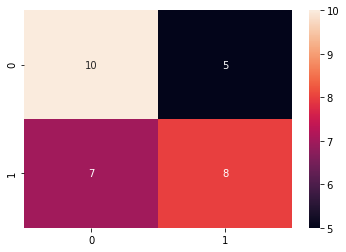

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gs = GridSearchCV(SVC(random_state=42),
                  param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [1e-3, 1e-2, 1e-1, 1, 10]})
gs.fit(X_train_scaled, y_train)

pred = gs.predict(X_test_scaled)
prob = gs.decision_function(X_test_scaled)
y_scores.append(prob)
classifiers.append(gs)

print(gs.best_params_)
print(classification_report(y_test, pred))
print('AUC', roc_auc_score(y_test, prob))

sns.heatmap(confusion_matrix(y_test, pred),
            annot=True, fmt='d')

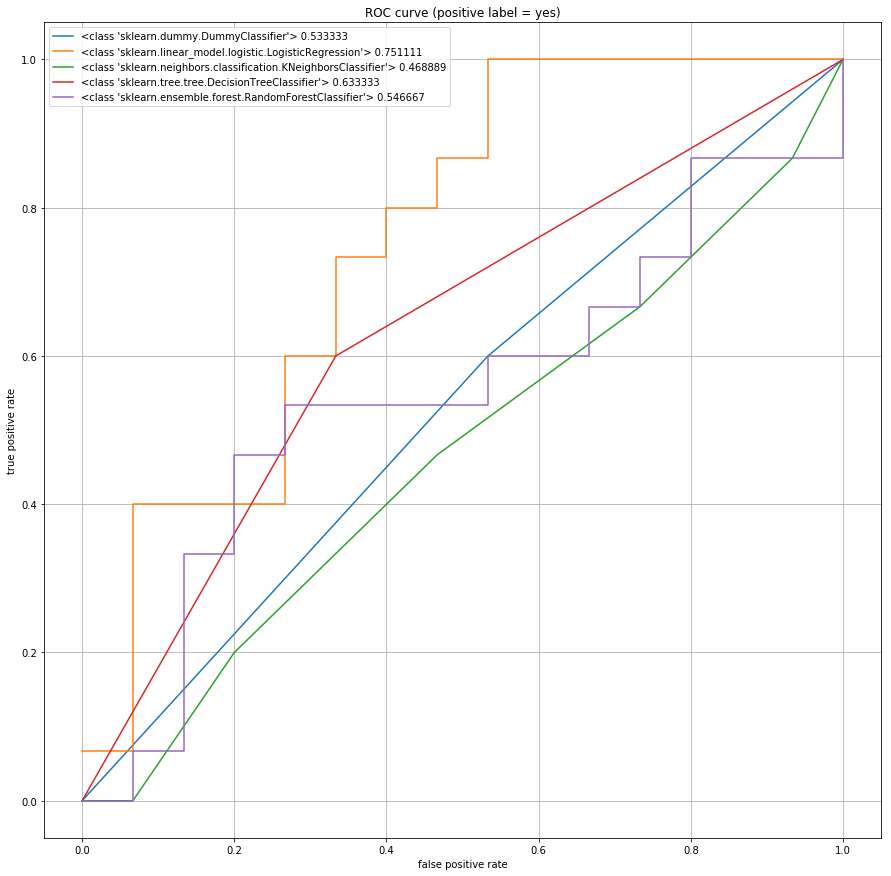

In [157]:
# plot the ROC curve of positive label = 1
from sklearn.metrics import auc, roc_curve

fig, ax = plt.subplots(figsize=(15, 15))

for clf, y_score in zip(classifiers, y_scores):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    ax.plot(fpr, tpr, label='%s %f' % (clf.__class__, auc(fpr, tpr)))

ax.set(title='ROC curve (positive label = yes)',
       xlabel='false positive rate', ylabel='true positive rate')
ax.legend(loc='upper left')
ax.grid()
plt.show()

In [166]:
best_model = classifiers[1]
best_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Predictions

In [183]:
df_predict

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-07,16,3,0,53,13,1,4,8,7,2,...,4,0,0,No,-1.0,4,0,0,0.0,-1.0
2018-07-07,28,9,0,43,7,3,3,1,1,2,...,2,0,0,No,-1.0,3,0,0,0.0,-1.0
2018-06-14,24,23,0,60,6,0,3,3,2,1,...,0,0,0,No,-1.0,2,0,0,0.0,-1.0
2018-02-07,3,16,2,47,21,10,7,4,8,0,...,2,0,0,Yes,51.0,4,0,0,0.0,-1.0
2018-07-07,9,28,2,57,12,2,4,6,6,1,...,1,0,0,Yes,30.0,3,0,0,0.0,-1.0


In [199]:
# preprocess
for c in ['Team', 'Opponent', 'Round', 'PSO']:
    df_predict[c] = encoders[c].transform(df_predict[c])

df_predict['1st Goal'].fillna(-1, inplace=True)
df_predict['Own goals'].fillna(0, inplace=True)
df_predict['Own goal Time'].fillna(-1, inplace=True)

X_predict = df_predict.loc[:, columns]
X_predict_scaled = X_scaler.transform(X_predict)

# predict
encoded_predict = best_model.predict(X_predict_scaled)
predict_probability = best_model.predict_proba(X_predict_scaled)[:, 1]

# interpret
df_predict['predictions'] = encoders['Man of the Match'].inverse_transform(encoded_predict)
df_predict['probability'] = predict_probability

df_predict

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,predictions,probability
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-07,16,3,0,53,13,1,4,8,7,2,...,0,No,-1.0,4,0,0,0.0,-1.0,No,0.021670
2018-07-07,28,9,0,43,7,3,3,1,1,2,...,0,No,-1.0,3,0,0,0.0,-1.0,No,0.200617
2018-06-14,24,23,0,60,6,0,3,3,2,1,...,0,No,-1.0,2,0,0,0.0,-1.0,No,0.225549
2018-02-07,3,16,2,47,21,10,7,4,8,0,...,0,Yes,51.0,4,0,0,0.0,-1.0,Yes,0.933086
2018-07-07,9,28,2,57,12,2,4,6,6,1,...,0,Yes,30.0,3,0,0,0.0,-1.0,No,0.326086


## Clustering Matches

Objective: find clusters of matches in the dataset

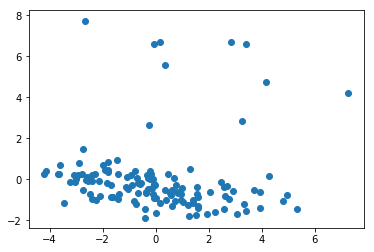

In [207]:
df_cluster = pd.read_csv('D:/tmp/fifa-2018-match-statistics/FIFA 2018 Statistics.csv',
                 parse_dates=['Date'],
                 index_col=0)

# turn into numbers
# skip the Team and Opponent columns as these identify our matches
for c in ['Man of the Match', 'Round', 'PSO']:
    df_cluster[c] = LabelEncoder().fit_transform(df_cluster[c])
    
df_cluster['1st Goal'].fillna(-1, inplace=True)
df_cluster['Own goals'].fillna(0, inplace=True)
df_cluster['Own goal Time'].fillna(-1, inplace=True)

columns = list(df_cluster.columns)
columns.remove('Team')
columns.remove('Opponent')

cluster_scaled = StandardScaler().fit_transform(df_cluster[columns])
cluster_scaled_2d = PCA(n_components=2).fit_transform(cluster_scaled)

fig, ax = plt.subplots()
ax.scatter(cluster_scaled_2d[:, 0], cluster_scaled_2d[:, 1])
plt.show()

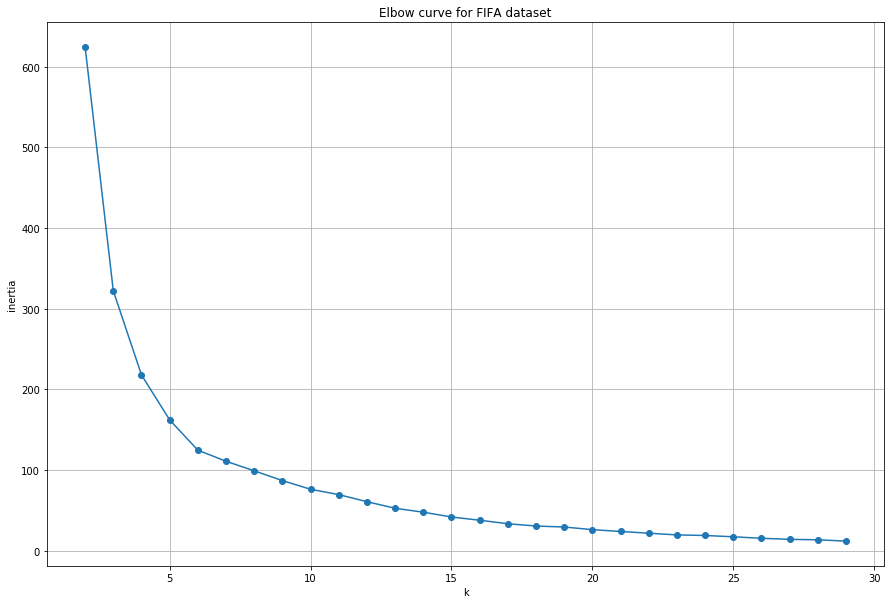

In [216]:
from sklearn.cluster import KMeans

ks = range(2, 30)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_scaled_2d)
    
    # inertia: sum of squared distances of samples
    # to their closest cluster center.
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(ks, inertias, marker='o')
ax.grid()
ax.set(title='Elbow curve for FIFA dataset with 2D PCA',
       xlabel='k', ylabel='inertia')
plt.show()

In [240]:
import numpy as np

def plot_decision_boundaries(ax, title, kmeans_model, data):
    """Plots the decision boundaries for a fitted k-means model
    Args:
        ax: subplot axis
        title: subplot title
        kmeans_model: a fitted sklearn.cluster.KMeans model
        data: 2-dimensional input data to cluster and plot
 
    Based on: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the trained model.
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Pastel2,
              aspect='auto', origin='lower')

    ax.plot(data[:, 0], data[:, 1], 'k.', markersize=4)

    # Plot the centroids as a red X
    centroids = kmeans.cluster_centers_

    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=169, linewidths=3,
               color='red', zorder=10, label='centroids')
    ax.set(title=title,
           xlim=(x_min, x_max), ylim=(y_min, y_max),
           xticks=(), yticks=())
    ax.legend()

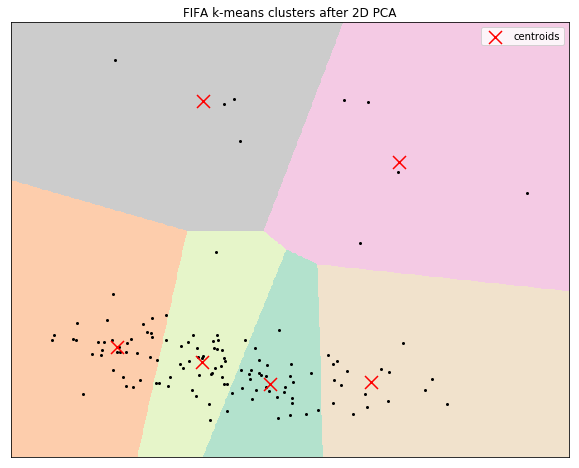

In [241]:
# Get kmeans for k=6

kmeans = KMeans(n_clusters=6)
kmeans.fit(cluster_scaled_2d)

fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundaries(ax, 'FIFA k-means clusters after 2D PCA', kmeans, cluster_scaled_2d)

In [242]:
# use DBSCAN to detect outliers

from sklearn.cluster import DBSCAN

# eps : float, optional
#    The maximum distance between two samples for them to be considered
#    as in the same neighborhood.

# min_samples : int, optional
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.

db = DBSCAN(eps=0.6, min_samples=5) # these can be tuned
                                    # based on how many clusters
                                    # you want DBSCAN to find

# If we fit using cluster_scaled, we don't get clear clusters
# In that case, clustering on PCA is ok because PCA is also a
# form of feature transformation
db.fit(cluster_scaled_2d)

db.labels_ # -1 means outlier

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,
       -1, -1,  0, -1, -1,  0,  0,  0,  0], dtype=int64)

In [243]:
# Plot DBSCAN (complicated!)
def plot_dbscan(ax, db, X, title):
    """Plots the clusters found by the DBSCAN algorithm
    Args:
        ax: matplotlib subplot axes
        db: the fitted DBSCAN clusterer
        X: the fitted data
        title: title of the plot    
    """
    import numpy as np
    labels = db.labels_

    # Get an array of zeros with the same shape and type
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    
    # Mark our core samples (used for identifying clusters)
    core_samples_mask[db.core_sample_indices_] = True

    # Plot outliers in black, clusters in colours
    black = [0, 0, 0, 1]

    unique_labels = set(labels)
    
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, color in zip(unique_labels, colors):
        if k == -1: # outliers
            color = black

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
                 markeredgecolor='k', markersize=14)

        # samples that are not core samples
        # black indicates they are outliers
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
                 markeredgecolor='k', markersize=6)

    ax.set(title=title, xticks=(), yticks=())

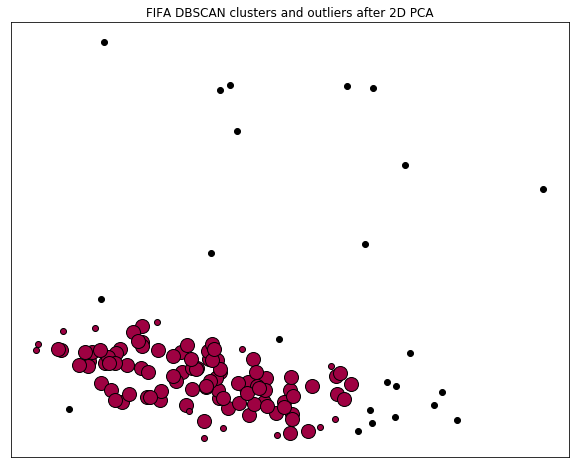

In [244]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_dbscan(ax, db, cluster_scaled_2d, 'FIFA DBSCAN clusters and outliers after 2D PCA')

In [239]:
# print outliers
df_cluster_original = pd.read_csv('D:/tmp/fifa-2018-match-statistics/FIFA 2018 Statistics.csv',
                                  parse_dates=['Date'],
                                  index_col=0)

# print the outliers (boolean indexing!)
outliers = df_cluster_original[db.labels_ == -1]
outliers

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-16,Argentina,Iceland,1,72,26,7,9,10,10,0,...,0,0,0,No,19.0,Group Stage,No,0,NaN,NaN
2018-06-17,Germany,Mexico,0,60,25,9,9,7,8,1,...,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
2018-06-20,Spain,Iran,1,70,17,3,6,8,6,1,...,0,0,0,Yes,54.0,Group Stage,No,0,NaN,NaN
2018-06-22,Brazil,Costa Rica,2,66,23,9,9,5,10,3,...,2,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
2018-06-23,Germany,Sweden,2,71,16,5,4,7,8,5,...,0,1,0,Yes,48.0,Group Stage,No,0,NaN,NaN
2018-06-25,Russia,Uruguay,0,44,3,1,1,1,2,2,...,1,1,0,No,NaN,Group Stage,No,0,1.0,23.0
2018-06-25,Saudi Arabia,Egypt,2,61,22,7,10,5,7,1,...,0,0,0,No,45.0,Group Stage,No,0,NaN,NaN
2018-06-25,Spain,Morocco,2,68,16,4,11,1,7,1,...,0,0,0,Yes,19.0,Group Stage,No,0,NaN,NaN
2018-06-27,Korea Republic,Germany,2,30,11,5,5,1,3,0,...,4,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN


In [246]:
# Another way to visualize: mark outliers and then do a pairplot

df_cluster['outlier'] = 0

# MOAR boolean indexing....
df_cluster.loc[db.labels_ == -1, 'outlier'] = 1

In [258]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2018-06-14 to 2018-07-15
Data columns (total 27 columns):
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
Man of the Match   

Too many features to do a pair plot, just pick a few that seem important to a match (I don't know soccer very well)

```
    'Ball Possession %',
    'Attempts',
    'On-Target',
    'Off-Target',
    'Blocked',
    'Corners',
    'Offsides',
    'Free Kicks',
    'Saves',
    'Pass Accuracy %',
    'Passes',
    'Distance Covered (Kms)',
    'Fouls Committed',
    'Yellow Card',
    'Red',
    '1st Goal',
    'Man of the Match'
```

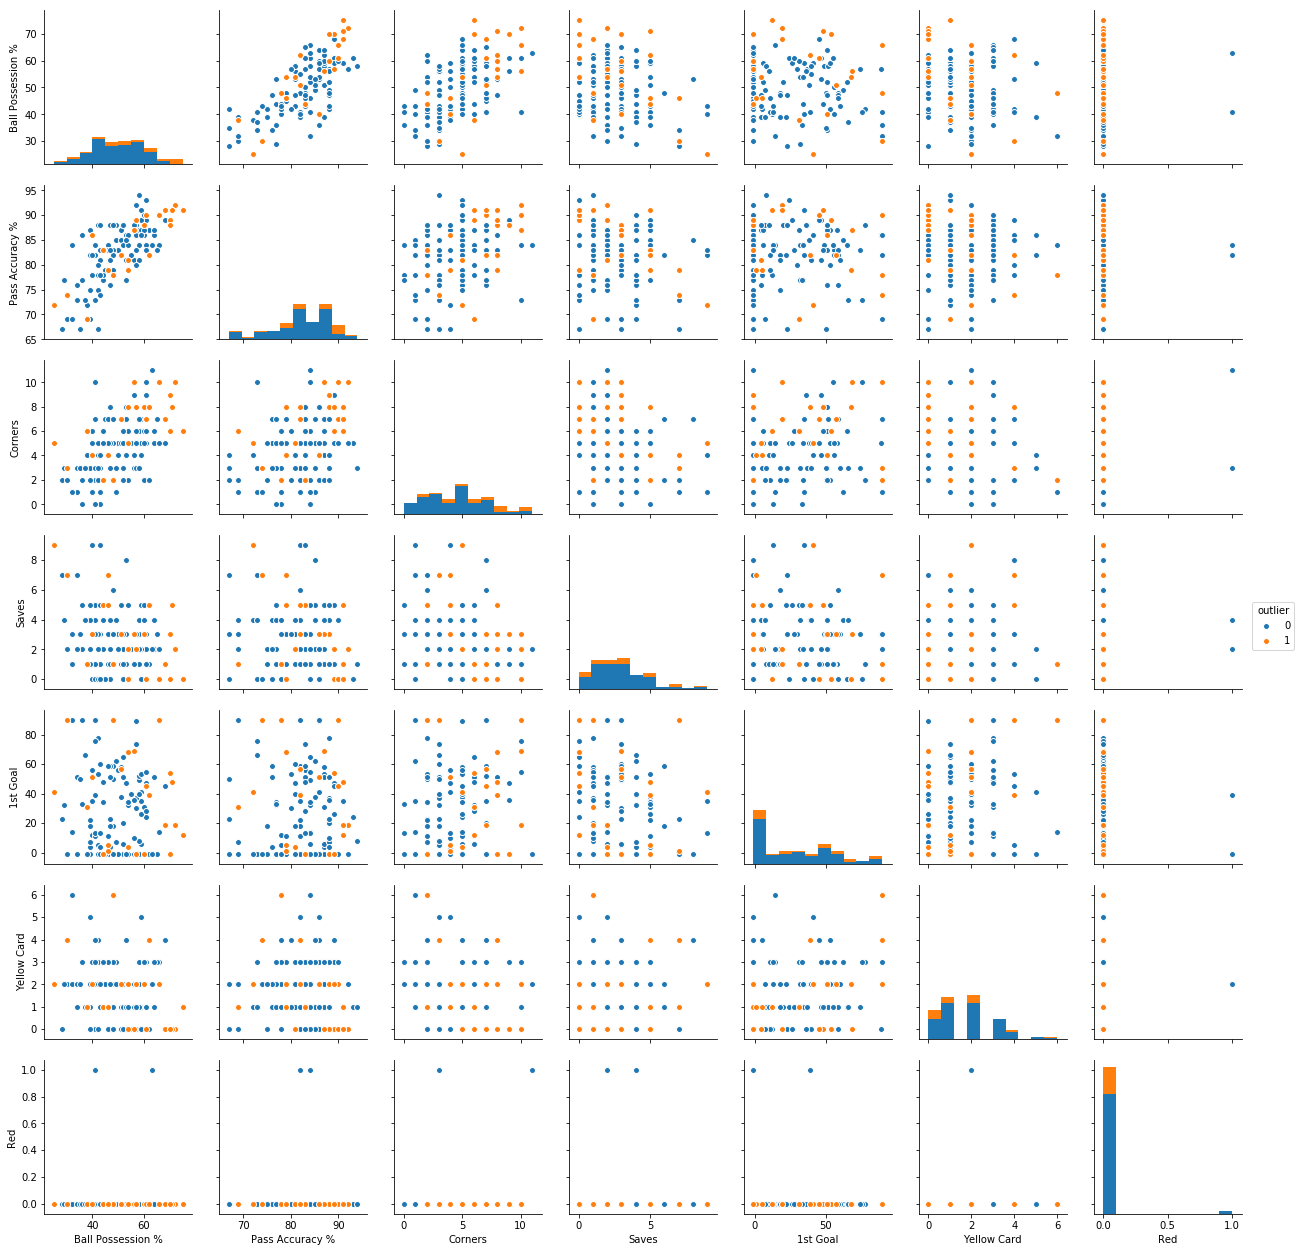

In [249]:
sns.pairplot(df_cluster, hue='outlier',
             vars=['Ball Possession %', 'Pass Accuracy %', 
                  'Corners', 'Saves', '1st Goal', 'Yellow Card', 'Red'])

KMeans without outliers

In [261]:
df_cluster.loc[db.labels_ != -1][columns]

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,5,40,13,7,3,3,6,3,11,0,...,0,0,0,1,12.0,2,0,0,0.0,-1.0
2018-06-14,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,-1.0,2,0,0,0.0,-1.0
2018-06-15,0,43,8,3,3,2,0,1,7,3,...,2,0,0,0,-1.0,2,0,0,0.0,-1.0
2018-06-15,1,57,14,4,6,4,5,1,13,3,...,0,0,0,1,89.0,2,0,0,0.0,-1.0
2018-06-15,0,64,13,3,6,4,5,0,14,2,...,1,0,0,0,-1.0,2,0,0,1.0,90.0
2018-06-15,1,36,8,2,5,1,2,0,22,2,...,3,0,0,1,90.0,2,0,0,0.0,-1.0
2018-06-15,3,39,8,3,2,3,4,1,13,2,...,1,0,0,0,4.0,2,0,0,0.0,-1.0
2018-06-15,3,61,12,5,5,2,5,3,13,0,...,1,0,0,1,24.0,2,0,0,0.0,-1.0
2018-06-16,2,51,12,5,4,3,5,0,19,1,...,1,0,0,1,58.0,2,0,0,0.0,-1.0


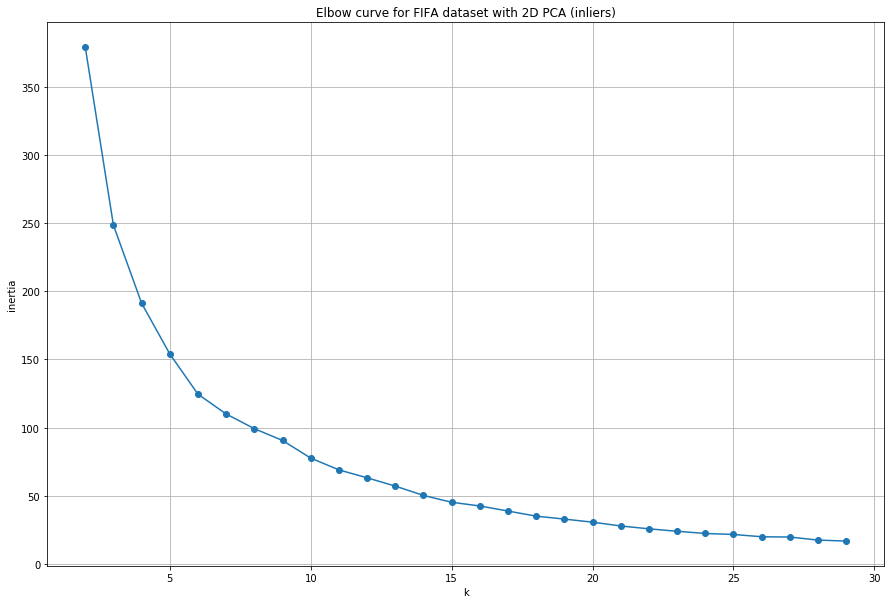

In [254]:
inliers = df_cluster.loc[db.labels_ != -1, columns]

inliers_scaled_2d = PCA(n_components=2).fit_transform(
    StandardScaler().fit_transform(inliers))

ks = range(2, 30)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(inliers_scaled_2d)
    
    # inertia: sum of squared distances of samples
    # to their closest cluster center.
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(ks, inertias, marker='o')
ax.grid()
ax.set(title='Elbow curve for FIFA dataset with 2D PCA (inliers)',
       xlabel='k', ylabel='inertia')
plt.show()

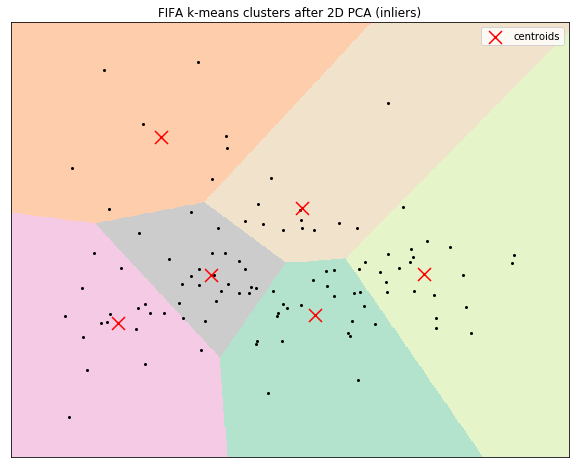

In [263]:
# Get kmeans for k=6

kmeans = KMeans(n_clusters=6)
kmeans.fit(inliers_scaled_2d)

fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundaries(ax, 'FIFA k-means clusters after 2D PCA (inliers)', kmeans, inliers_scaled_2d)

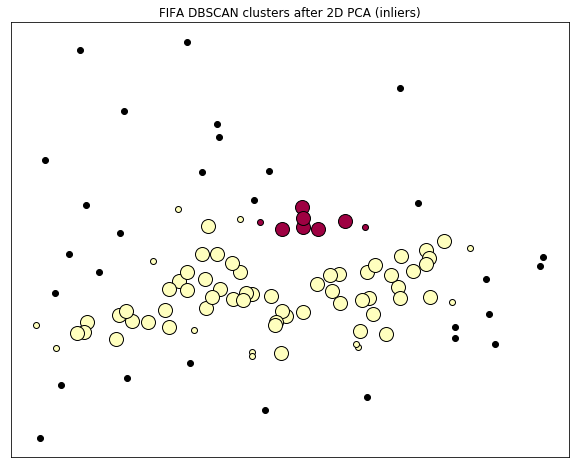

In [288]:
db2 = DBSCAN(eps=0.7, min_samples=5) # these can be tuned
                                    # based on how many clusters
                                    # you want DBSCAN to find

db2.fit(inliers_scaled_2d)

fig, ax = plt.subplots(figsize=(10, 8))
plot_dbscan(ax, db2, inliers_scaled_2d, 'FIFA DBSCAN clusters after 2D PCA (inliers)')

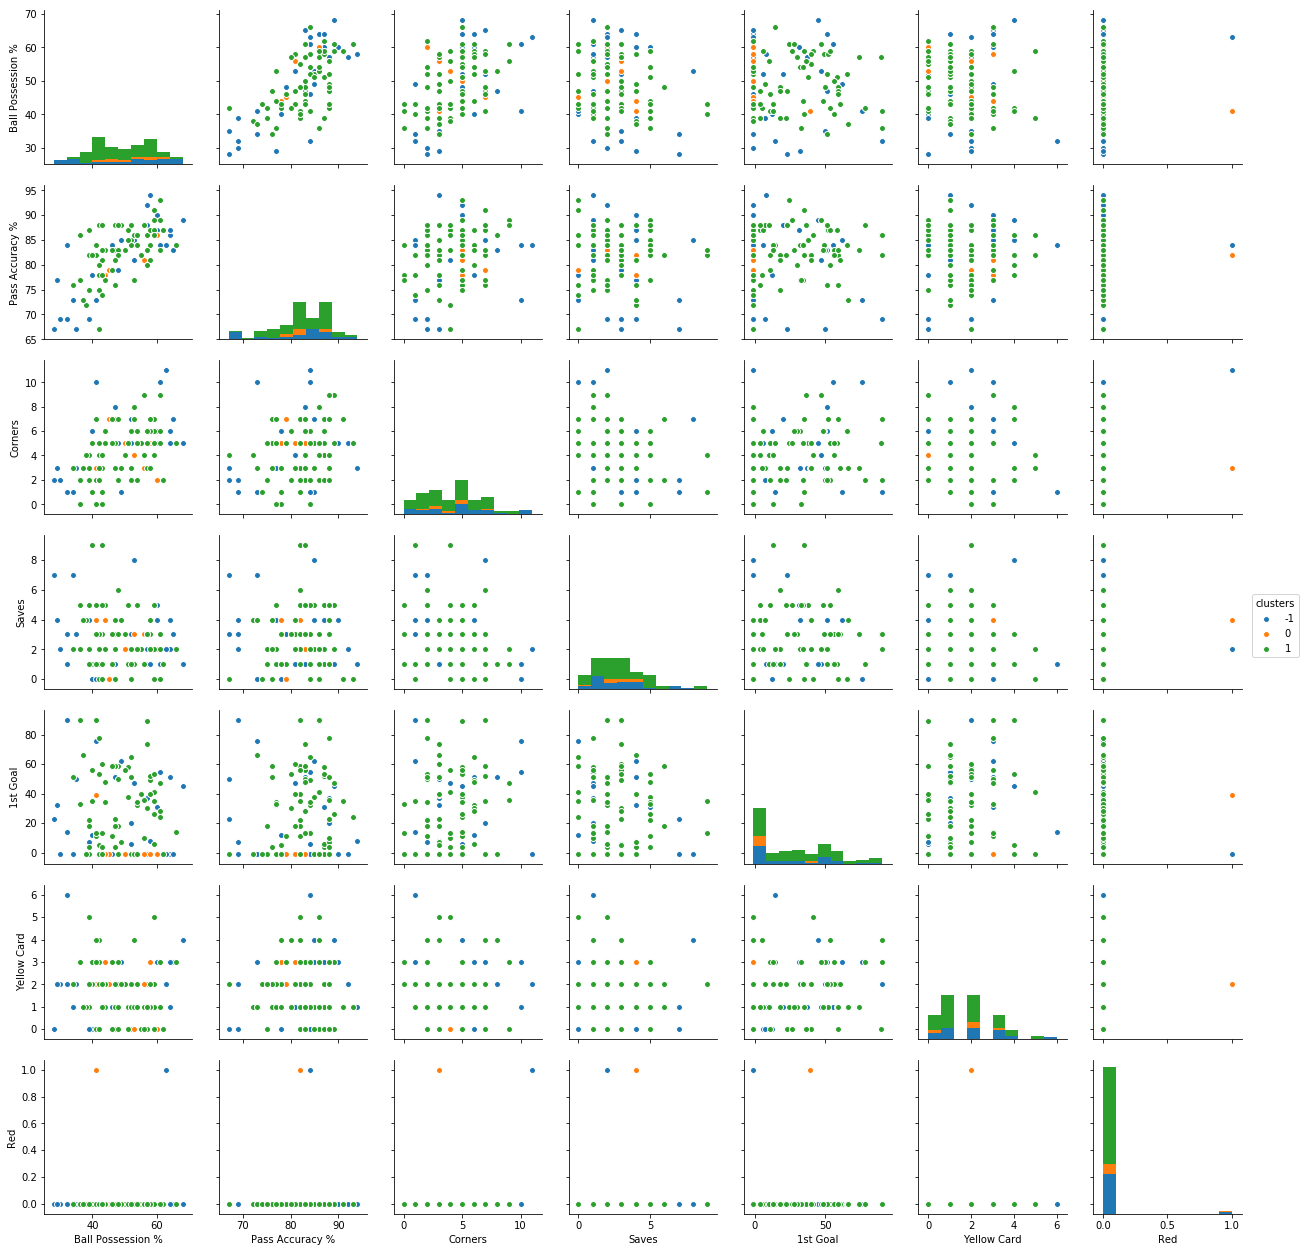

In [289]:
# pairplot the new clusters

columns2 = ['Ball Possession %', 'Pass Accuracy %', 
            'Corners', 'Saves', '1st Goal', 'Yellow Card', 'Red']

inliers['clusters'] = db2.labels_

sns.pairplot(inliers, hue='clusters', vars=columns2)